In [65]:
'''
Data: https://www.kaggle.com/datasets/vitthalmadane/ts-temp-1
To forecast temperature data using the Prophet model, you would typically follow these steps:

Install Prophet: If you haven't already, install the Prophet package by Facebook.
pip install fbprophet
Prepare the Data: The Prophet model requires the dataset to be in a specific format with two columns: ds and y. The ds (datestamp) column should be of a date format (YYYY-MM-DD for a date or YYYY-MM-DD HH:MM:SS for a timestamp), and the y column must contain the numeric values we want to predict, in this case, the temperature data.
import pandas as pd

# Assuming df is your DataFrame and it has a 'date' column with dates and a 'temp' column with temperature values
df_prophet = pd.DataFrame()
df_prophet['ds'] = pd.to_datetime(df['date'])
df_prophet['y'] = df['temp']
Create and Fit the Model: Create an instance of the Prophet class and fit it to your historical data.
from fbprophet import Prophet

# Initialize the Prophet model
m = Prophet()

# Fit the model with your dataframe
m.fit(df_prophet)
Create Future Dataframe: Create a future dataframe for which you want to make predictions. You can specify the number of periods ahead you want to predict.
# For forecasting 365 days into the future
future = m.make_future_dataframe(periods=365)
Make Predictions: Use the future dataframe to make predictions.
forecast = m.predict(future)
Review Forecast: The forecast dataframe now contains the predictions along with several components like trend and seasonality.
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail())
Plot the Forecast: Visualize the forecast with provided plotting functions.
fig1 = m.plot(forecast)
fig2 = m.plot_components(forecast)

Please note that this is a simplified guide to get you started with forecasting temperature data using the Prophet model. There are many parameters and options within Prophet that allow you to customize the model to better fit your data's characteristics, such as adding holidays, adjusting seasonality, and incorporating external regressors.

'''

"\nData: https://www.kaggle.com/datasets/vitthalmadane/ts-temp-1\nTo forecast temperature data using the Prophet model, you would typically follow these steps:\n\nInstall Prophet: If you haven't already, install the Prophet package by Facebook.\npip install fbprophet\nPrepare the Data: The Prophet model requires the dataset to be in a specific format with two columns: ds and y. The ds (datestamp) column should be of a date format (YYYY-MM-DD for a date or YYYY-MM-DD HH:MM:SS for a timestamp), and the y column must contain the numeric values we want to predict, in this case, the temperature data.\nimport pandas as pd\n\n# Assuming df is your DataFrame and it has a 'date' column with dates and a 'temp' column with temperature values\ndf_prophet = pd.DataFrame()\ndf_prophet['ds'] = pd.to_datetime(df['date'])\ndf_prophet['y'] = df['temp']\nCreate and Fit the Model: Create an instance of the Prophet class and fit it to your historical data.\nfrom fbprophet import Prophet\n\n# Initialize the

In [66]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from prophet import Prophet
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score 

In [67]:
df = pd.read_csv('../../dataset/MLTempDataset.csv')

In [68]:
# EDA
print(df.head())
print(df.info())
print(df.describe())

   Unnamed: 0  Datetime1  DAYTON_MW             Datetime
0           0          0     20.867  2022-01-04 00:00:00
1           1          1     21.000  2022-01-04 01:00:00
2           2          2     20.867  2022-01-04 02:00:00
3           3          3     20.650  2022-01-04 03:00:00
4           4          4     20.400  2022-01-04 04:00:00
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6676 entries, 0 to 6675
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  6676 non-null   int64  
 1   Datetime1   6676 non-null   int64  
 2   DAYTON_MW   6676 non-null   float64
 3   Datetime    6676 non-null   object 
dtypes: float64(1), int64(2), object(1)
memory usage: 208.8+ KB
None
        Unnamed: 0    Datetime1    DAYTON_MW
count  6676.000000  6676.000000  6676.000000
mean   3337.500000    11.502846    21.736007
std    1927.339531     6.909701     6.850502
min       0.000000     0.000000     5.350000
25%    1668.

In [69]:
# visualize the data
# plt.figure(figsize=(15, 6))
# plt.plot(df['Datetime'], df['DAYTON_MW'], label='Temperature')
# plt.title('Temperature Time Series')
# plt.xlabel('Date')
# plt.ylabel('Temperature')
# plt.legend()
# plt.show()

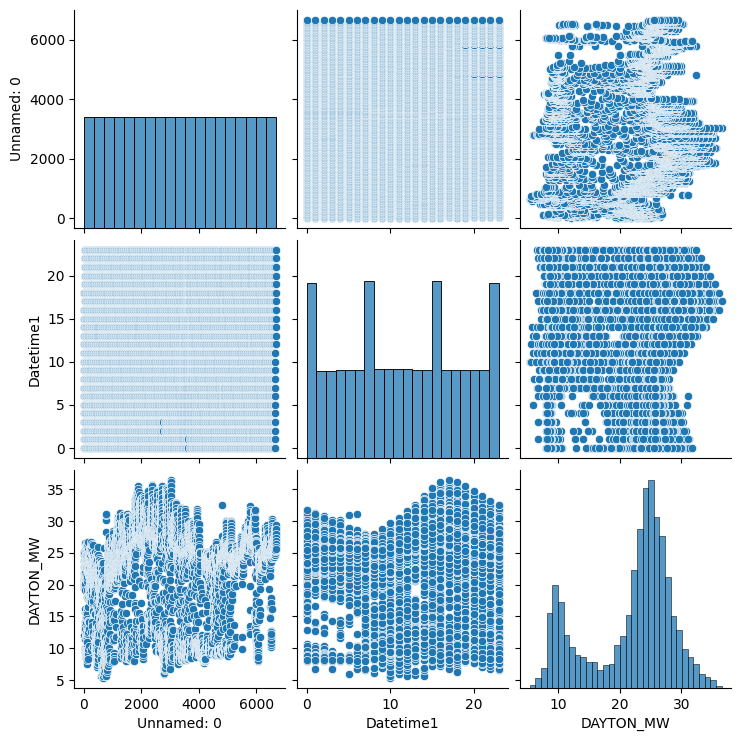

In [70]:
sb.pairplot(df)

In [71]:
df_prophet = pd.DataFrame()
df_prophet['ds'] = pd.to_datetime(df['Datetime'])
df_prophet['y'] = df['DAYTON_MW']

In [72]:
# make sure your DataFrame is sorted by date
df_prophet = df_prophet.sort_values('ds')

# define the split point (e.g., last 20% of the data for testing)
split_point = int(len(df_prophet) * 0.8)

# split the data into train and test sets
df_train = df_prophet[:split_point]
df_test = df_prophet[split_point:]

In [73]:
# initialize the prophet model
model = Prophet(daily_seasonality=True, yearly_seasonality=True, weekly_seasonality=True, seasonality_mode='additive')

# fit the model with the training data
model.fit(df_train)

# create a DataFrame for future dates to predict
future = model.make_future_dataframe(periods=len(df_test), freq='H')
# make predictions
forecast = model.predict(future)

09:22:01 - cmdstanpy - INFO - Chain [1] start processing
09:22:01 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\71526\AppData\Roaming\Python\Python312\site-packages\prophet\forecaster.py:1854: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dates = pd.date_range(


In [74]:

# make predictions
forecast = model.predict(future)


In [75]:
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail())

                      ds       yhat  yhat_lower  yhat_upper
6671 2022-10-08 23:00:00  25.436856   17.493314   33.736384
6672 2022-10-09 00:00:00  24.636932   16.501365   32.484924
6673 2022-10-09 01:00:00  23.955405   15.825341   31.806663
6674 2022-10-09 02:00:00  23.506827   14.351470   31.619439
6675 2022-10-09 03:00:00  23.205381   15.448672   31.552679


C:\Users\71526\AppData\Roaming\Python\Python312\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\71526\AppData\Roaming\Python\Python312\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',
C:\Users\71526\AppData\Roaming\Python\Python312\site-packages\prophet\plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects in

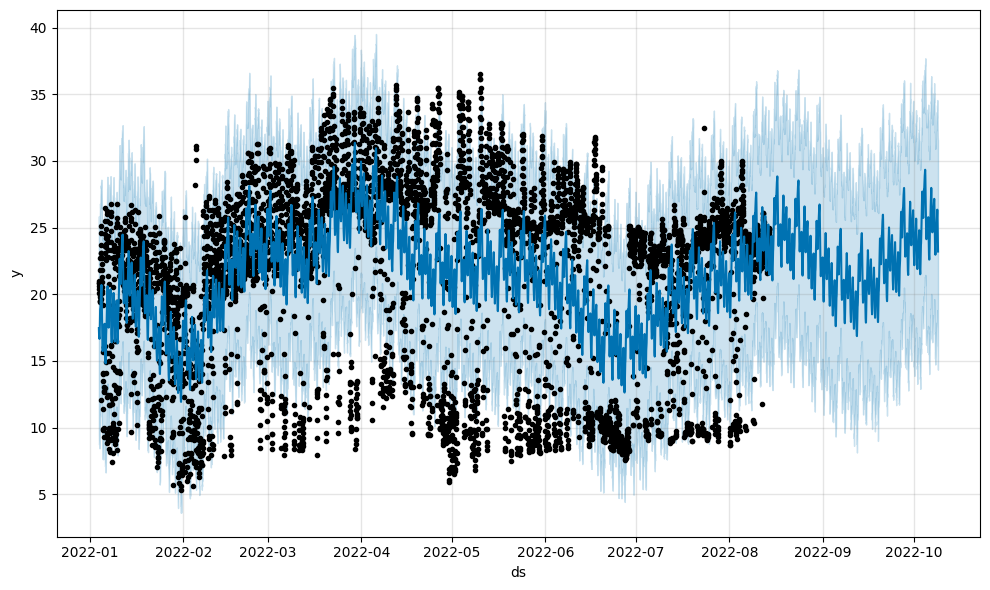

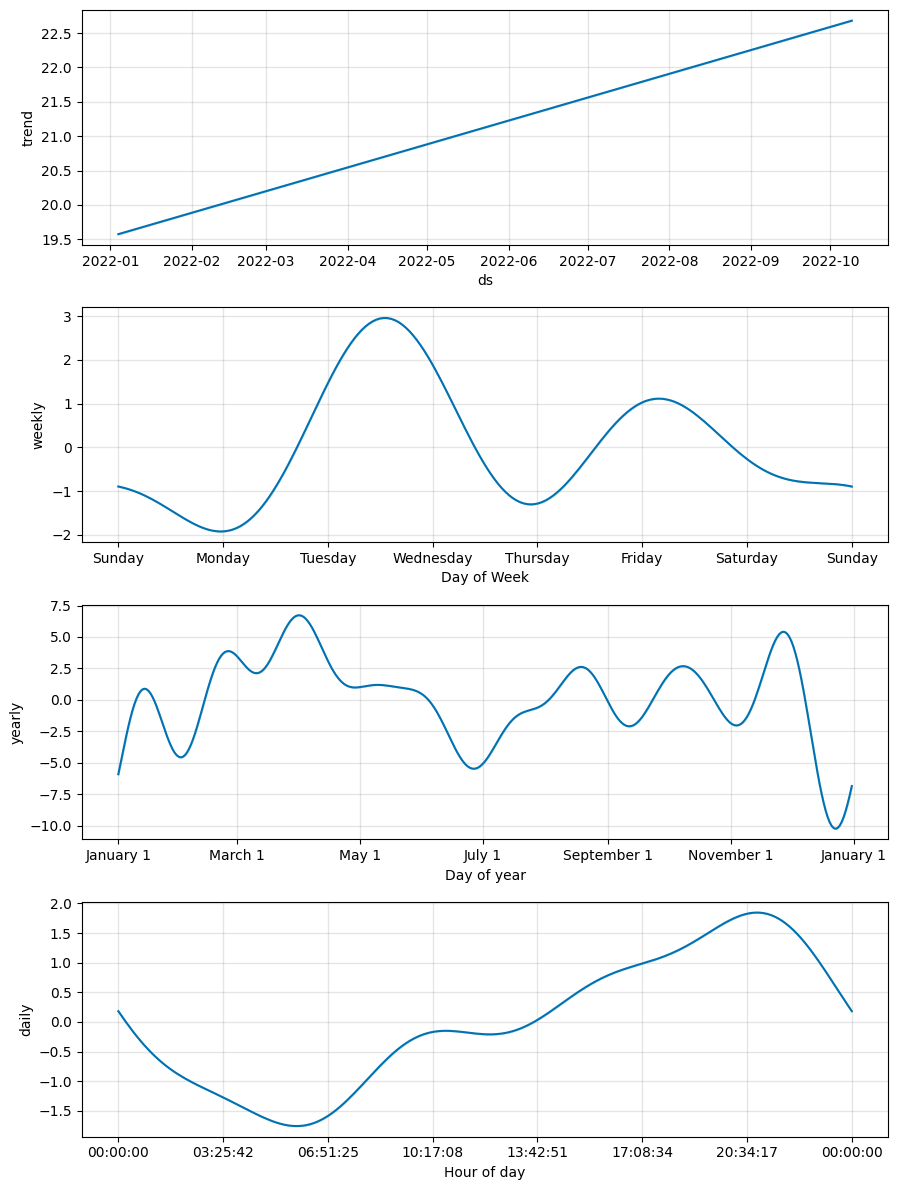

In [76]:
fig1 = model.plot(forecast)
fig2 = model.plot_components(forecast)

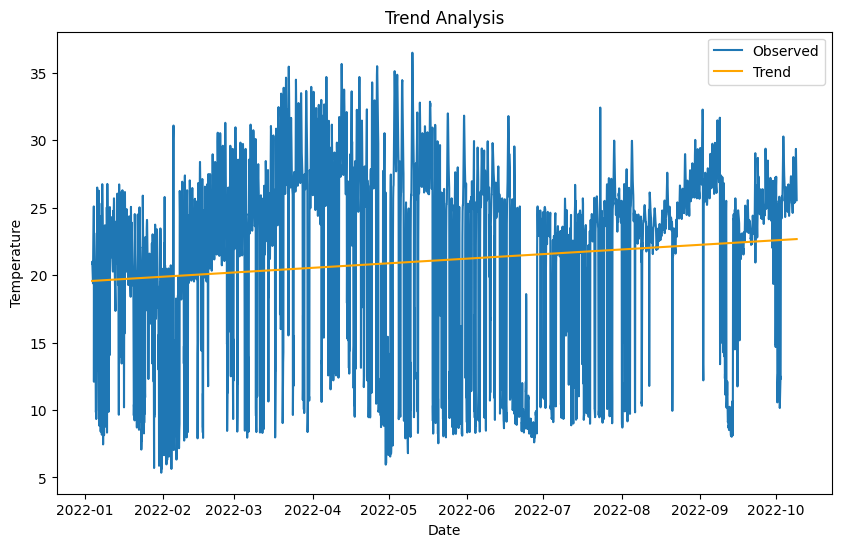

In [77]:
# trend Analysis (how the tren evolves over time)s
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(df_prophet['ds'], df_prophet['y'], label='Observed')
ax.plot(forecast['ds'], forecast['trend'], label='Trend', color='orange')
plt.title('Trend Analysis')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.legend()
plt.show()

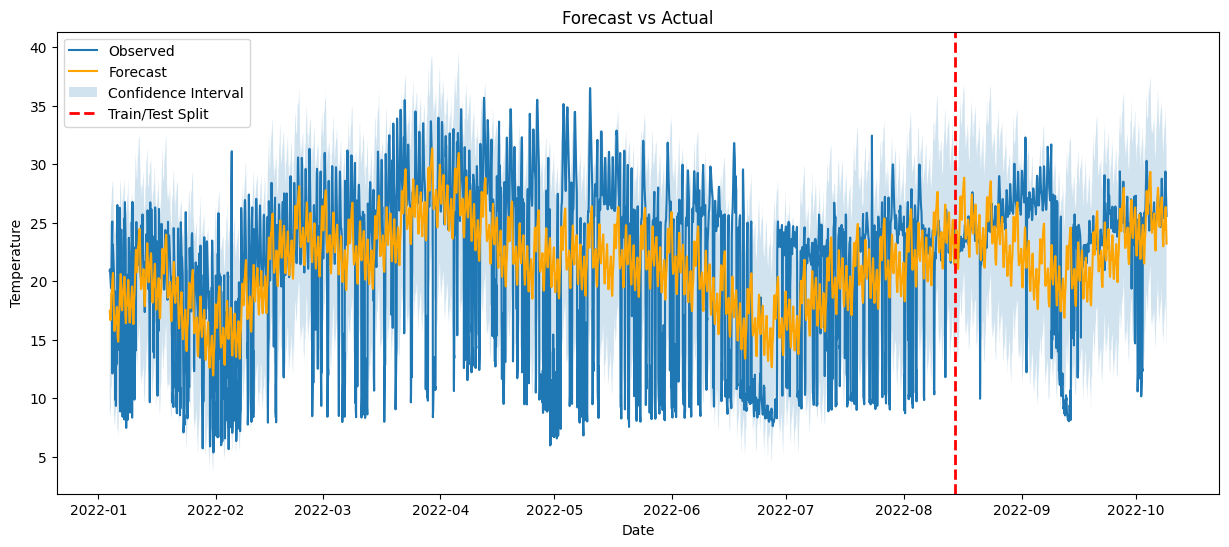

In [78]:

plt.figure(figsize=(15, 6))
plt.plot(df_prophet['ds'], df_prophet['y'], label='Observed')
plt.plot(forecast['ds'], forecast['yhat'], label='Forecast', color='orange')
plt.fill_between(forecast['ds'], forecast['yhat_lower'], forecast['yhat_upper'], alpha=0.2, label='Confidence Interval')
plt.axvline(x=df_prophet['ds'][split_point], color='red', linestyle='--', linewidth=2, label='Train/Test Split')
plt.title('Forecast vs Actual')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.legend()
plt.show()


In [79]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Calculate metrics
mae = mean_absolute_error(df_prophet['y'], forecast['yhat'][:len(df_prophet)])
mse = mean_squared_error(df_prophet['y'], forecast['yhat'][:len(df_prophet)])
rmse = np.sqrt(mse)

r_squared = r2_score(df_prophet['y'], forecast['yhat'][:len(df_prophet)])

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R^2: {r_squared}")

MAE: 4.871110590986029
MSE: 36.82865079704855
RMSE: 6.068661367801679
R^2: 0.21511483151792188
